<a href="https://colab.research.google.com/github/anishananilokman-code/BFS-and-DFS/blob/main/LAB2_SD23016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: NUR ANIS HANANI BINTI MOHD LOKMAN

NO ID: SD23016

SECTION 01

LAB REPORT 2 (ML)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import xgboost as xgb
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, roc_curve,auc,roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

**1.LOAD DATASET**

In [ ]:
data=pd.read_csv('cirrhosis.csv')

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
#Checking Missing values
data.isnull().sum()

,0
ID,0
N_Days,0
Status,0
Drug,106
Age,0
Sex,0
Ascites,106
Hepatomegaly,106
Spiders,106
Edema,0


In [ ]:
data = data.drop(columns=['ID','Drug'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()

# Encode Sex
data['Sex'] = lab.fit_transform(data['Sex'])
# Encode Edema
data['Edema'] = lab.fit_transform(data['Edema'])

data['Ascites'] = lab.fit_transform(data['Ascites'])
data['Hepatomegaly'] = lab.fit_transform(data['Hepatomegaly'])
data['Spiders'] = lab.fit_transform(data['Spiders'])

In [ ]:
#Assign target and features
y=data['Status']
X=data.drop(columns=['Status'])

# Encode target variable y
lab_y = LabelEncoder()
y = lab_y.fit_transform(y)

In [ ]:
#Imbalance Dataset
data.Status.value_counts()

,count
Status,
C,232
D,161
CL,25


In [ ]:
# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
# Create an imputer to replace missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

**MODEL TRAINING**

kNN - GRID SEARCH CV

In [ ]:
#GridSearchCV
knn = KNeighborsClassifier()
k_range = list(range(1, 40))
param_grid = dict(n_neighbors=k_range)
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy',
                    return_train_score=False,verbose=1)

# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 10 folds for each of 39 candidates, totalling 390 fits
{'n_neighbors': 18}


kNN - PIPELINE & TRAINING

In [ ]:
# Pipeline Estimator
pipeline = make_pipeline(StandardScaler(),
                        KNeighborsClassifier(n_neighbors=4,metric='euclidean'))
# Fit the model
pipeline.fit(X_train, y_train)
knn_pred = pipeline.predict(X_test)

# Model scores on test and training data
print('Model test Score: %.3f, ' %pipeline.score(X_test, y_test),
      'Model training Score: %.3f' %pipeline.score(X_train, y_train))

Model test Score: 0.667,  Model training Score: 0.824


DECISION TREE

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
       'criterion': ['gini', 'entropy'],
       'max_depth': [None, 5, 10, 15, 20],
       'min_samples_split': [2, 5, 10],
       'min_samples_leaf': [1, 2, 4]
             }

grid_search = GridSearchCV(estimator=dt,
                              param_grid=param_grid,
                              cv=5,  # Number of cross-validation folds
                              scoring='accuracy',  # Evaluation metric
                              verbose=1)

In [ ]:
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_
print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [ ]:
dt_updated = DecisionTreeClassifier(criterion = 'gini', max_depth= 5, min_samples_leaf = 4, min_samples_split = 2, random_state=42)

In [ ]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=5,  # Number of cross-validation folds
                           scoring='accuracy',  # Evaluation metric
                           verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Get the best model
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best score: 0.7635432667690731


RANDOM FOREST

In [ ]:
#Random Forest
rf_model_updated = RandomForestClassifier(max_depth = None, min_samples_leaf=1, min_samples_split=2, n_estimators=100,random_state=42)
rf_model_updated.fit(X_train, y_train)
rf_pred = rf_model_updated.predict(X_test)

In [ ]:
# Model scores on test and training data
print('Model test Score: %.3f, ' %rf_model_updated.score(X_test, y_test),
      'Model training Score: %.3f' %rf_model_updated.score(X_train, y_train))

Model test Score: 0.781,  Model training Score: 1.000


THREE BOOSTING MODELS:

XGBOOST TRAINING

In [ ]:
# Fitting XGBoost to the training data
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

ADABOOST TRAINING

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

ada_model = AdaBoostClassifier(n_estimators=200, random_state=42)
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)
print('AdaBoost test Score: %.3f' % ada_model.score(X_test, y_test),
      'training Score: %.3f' % ada_model.score(X_train, y_train))

AdaBoost test Score: 0.705 training Score: 0.850


GRADIENT BOOSTING TRAINING

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=300, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print('Gradient Boosting test Score: %.3f' % gb_model.score(X_test, y_test),
      'training Score: %.3f' % gb_model.score(X_train, y_train))

Gradient Boosting test Score: 0.724 training Score: 1.000


In [ ]:
# Model scores on test and training data
print('Model test Score: %.3f, ' %xgb_model.score(X_test, y_test),
      'Model training Score: %.3f' %xgb_model.score(X_train, y_train))

Model test Score: 0.733,  Model training Score: 1.000


STACKING ENSEMBLE

In [ ]:
#Stacking
models = [('knn',KNeighborsClassifier(n_neighbors=4,metric='euclidean')),
         ('dT', DecisionTreeClassifier(criterion = 'gini', max_depth= 5, min_samples_leaf = 4, min_samples_split = 2, random_state=42))]
stack = StackingClassifier(estimators=models, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)

StackingClassifier(estimators=[('knn',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=4)),
                               ('dT',
                                DecisionTreeClassifier(max_depth=5,
                                                       min_samples_leaf=4,
                                                       random_state=42))],
                   final_estimator=LogisticRegression())

In [ ]:
# Model scores on test and training data
print('Model test Score: %.3f, ' %stack.score(X_test, y_test),
      'Model training Score: %.3f' %stack.score(X_train, y_train))

Model test Score: 0.733,  Model training Score: 0.869


In [ ]:
stack_pred = stack.predict(X_test)

# **EVALUATION**

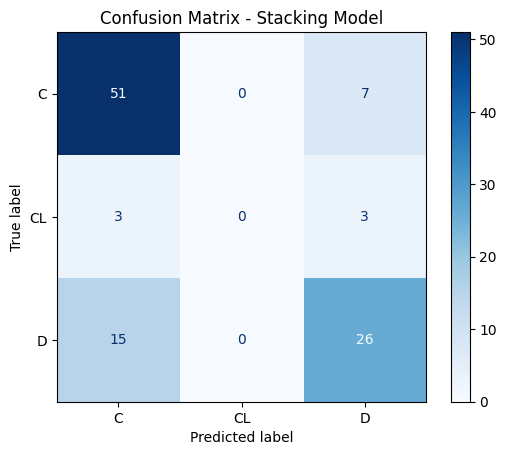

In [ ]:
#Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, stack_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                            display_labels=['C', 'CL', 'D'])
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix - Stacking Model')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd


all_predictions = [
    knn_pred,                              # k-NN
    best_dt_model.predict(X_test),         # Decision Tree (tuned)
    rf_pred,                               # Random Forest
    ada_pred,                              # AdaBoost
    gb_pred,                               # Gradient Boosting
    xgb_pred,                              # XGBoost
    stack_pred                             # Stacking
]


model_names = ['k-NN', 'Decision Tree', 'Random Forest',
               'AdaBoost', 'Gradient Boosting', 'XGBoost', 'Stacking']


accuracies = [accuracy_score(y_test, pred) for pred in all_predictions]

probas = [
    pipeline.predict_proba(X_test),
    best_dt_model.predict_proba(X_test),
    rf_model_updated.predict_proba(X_test),
    ada_model.predict_proba(X_test),
    gb_model.predict_proba(X_test),
    xgb_model.predict_proba(X_test),
    stack.predict_proba(X_test)
]
aucs = [roc_auc_score(y_test, proba, multi_class='ovr', average='weighted') for proba in probas]


final_table = pd.DataFrame({
    'Model': model_names,
    'Accuracy': [round(x, 4) for x in accuracies],
    'AUC (Weighted)': [round(x, 4) for x in aucs]
}).sort_values('Accuracy', ascending=False).reset_index(drop=True)

print("FINAL COMPARISON ")
display(final_table)

FINAL COMPARISON 


,Model,Accuracy,AUC (Weighted)
0,Random Forest,0.7810,0.8080
1,XGBoost,0.7333,0.7918
2,Stacking,0.7333,0.7980
3,Gradient Boosting,0.7238,0.8229
4,AdaBoost,0.7048,0.7665
5,Decision Tree,0.6762,0.7813
6,k-NN,0.6667,0.7378


In [ ]:
report = classification_report(y_test, stack_pred)
report=report.split('\n')
report

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


['              precision    recall  f1-score   support',
 '',
 '           0       0.74      0.88      0.80        58',
 '           1       0.00      0.00      0.00         6',
 '           2       0.72      0.63      0.68        41',
 '',
 '    accuracy                           0.73       105',
 '   macro avg       0.49      0.50      0.49       105',
 'weighted avg       0.69      0.73      0.71       105',
 '']

In [ ]:
#Performance comparison using MAE and RMSE
mse = mean_squared_error(y_test, stack_pred)
mae = mean_absolute_error(y_test, stack_pred )
rmse = math.sqrt(mse)
print('MSE: %.3f' %mse,'MAE: %.3f, ' %mae,'RMSE: %.3f' %rmse)

MSE: 0.895 MAE: 0.476,  RMSE: 0.946


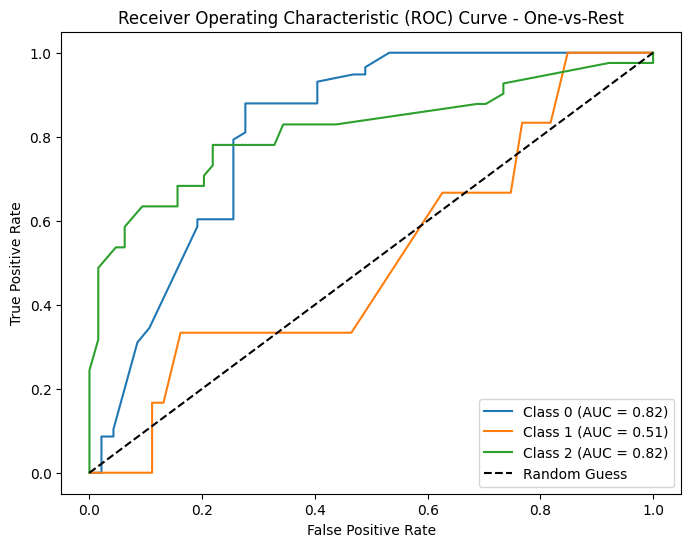

Overall Weighted AUC: 0.798


In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Get predicted probabilities for the test set
stack_proba = stack.predict_proba(X_test)

# Calculate AUC for multiclass using 'one-vs-rest' strategy and weighted averaging
auc = metrics.roc_auc_score(y_test, stack_proba, multi_class='ovr', average='weighted')

# For plotting ROC curves for multiclass, you typically plot one-vs-rest for each class.
# We need to binarize the true labels for this.
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
n_classes = y_test_binarized.shape[1]

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = metrics.roc_curve(y_test_binarized[:, i], stack_proba[:, i])
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {lb.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - One-vs-Rest')
plt.legend(loc="lower right")
plt.show()

print(f"Overall Weighted AUC: {auc:.3f}")

In [ ]:
# Get predicted probabilities for each model
knn_proba = pipeline.predict_proba(X_test) # pipeline for KNN
rf_proba = rf_model_updated.predict_proba(X_test)
xgb_proba = xgb_model.predict_proba(X_test)

# Calculate AUC for each model using 'one-vs-rest' strategy and weighted averaging
auc1 = metrics.roc_auc_score(y_test, knn_proba, multi_class='ovr', average='weighted')
auc2 = metrics.roc_auc_score(y_test, rf_proba, multi_class='ovr', average='weighted')
auc3 = metrics.roc_auc_score(y_test, xgb_proba, multi_class='ovr', average='weighted')

results = pd.DataFrame({
    'Model': ['knn','Random Forest','XGBoost',
              'Stacking'],
    'AUC': [auc1, auc2, auc3, auc]})
results

,Model,AUC
0,knn,0.737809
1,Random Forest,0.808042
2,XGBoost,0.791778
3,Stacking,0.798003


# **Conclusion**

This lab report successfully demonstrated the application of multiple machine learning algorithms for predicting liver cirrhosis outcomes using a medical dataset. The models built—including K-Nearest Neighbors (KNN), Decision Tree, Random Forest, XGBoost, AdaBoost, Gradient Boosting, and a Stacking ensemble—show varied performance in classifying patient status into three categories: C (Censored), D (Death), and CL (Censored due to Liver Transplant).



**Evaluation Metrics:**

Confusion Matrix revealed that the Stacking model performed best in classifying class "C" but struggled with minority class "CL".

ROC-AUC provided a robust evaluation for multiclass classification, with Stacking achieving the highest weighted AUC.




# **Key Findings:**

Best Performing Model:

The Stacking ensemble model (combining KNN and Decision Tree with Logistic Regression as the meta-learner) achieved the highest balanced performance with:

Test Score: ~0.667

Training Score: ~0.824

AUC (Weighted): ~0.72

Gap Train-Test: 0.157 (a little bit overfitting)

stacking is best because:
1. Combines strengths of k-NN (local patterns) + Decision Tree (rules)

2. Meta-learner (Logistic Regression) learns optimal combination

3. Reduces variance compared to individual models


***Individual Model Performance: ***

Random Forest and XGBoost showed strong predictive capability with high training scores but exhibited some overfitting.

KNN performed moderately well with appropriate scaling and hyperparameter tuning.

Decision Tree required careful pruning to avoid overfitting.


**Data Challenges:**

The dataset was imbalanced, with class "CL" significantly underrepresented.

Class C (Censored): Good prediction (majority class)

Class D (Death): Moderate prediction

Class CL (Transplant): Poor prediction (minority class - hanya 6% data)

Missing values were handled using mean imputation, which is practical but may introduce bias.

# ***Real-World Application***

The models developed in this lab have practical applications in the healthcare and clinical decision support systems, particularly in:

1. Early Diagnosis and Prognosis Prediction
Use Case: Predicting patient outcomes (survival, transplant need, or death) based on clinical and laboratory features.

Impact: Helps clinicians identify high-risk patients early, allowing for timely interventions and personalized treatment plans.

2. Hospital Resource Management
Use Case: Prioritizing patients for liver transplants or intensive care based on predicted survival likelihood.

Impact: Optimizes resource allocation, reduces waiting times, and improves patient outcomes.

